# Klasteryzacja

## Konfiguracja

U≈ºyjemy standardowych bibliotek oraz dodatkowo:
- Plotly - do wizualizacji
- UMAP, HDBSCAN - implementacja algorytm√≥w

**Uwaga:** upewnij siƒô, ≈ºe masz scikit-learn w wersji 1.2 lub nowszej (druga kom√≥rka poni≈ºej). Dziƒôki temu bƒôdzie mo≈ºna ustawiƒá opcjƒô `transform_output="pandas"`, dziƒôki kt√≥rej wszystkie transformatory w scikit-learn bƒôdƒÖ nie tylko przyjmowaƒá, ale te≈º zwracaƒá DataFrame, zachowujƒÖc nazwy zmiennych. Bƒôdzie to bardzo przydatne w analizie danych.

In [ ]:
!pip install numpy scipy pandas matplotlib scikit-learn missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install plotly umap-learn hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 88.2/88.2 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.2/5.2 MB 29.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=3a9adff7c25a53f641690006dd17e2aadb7693b745c36429237c90414065bd80
  Stored in directory: /root/.cache/pip/wheels/a

In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
import sklearn


sklearn.set_config(transform_output="pandas")

## Analiza muzyki ze Spotify

Spotify w swoim API oferuje automatycznƒÖ [ekstrakcjƒô cech z piosenek](https://developer.spotify.com/documentation/web-api/reference/get-audio-features), kt√≥rych mo≈ºna nastƒôpnie u≈ºyƒá do wielu ciekawych analiz, jak np. [tutaj](https://rpubs.com/PeterDola/SpotifyTracks) lub [tutaj](https://rstudio-pubs-static.s3.amazonaws.com/604869_8399a2cf0e4a419da6272452c3d6a6d3.html). Dataset√≥w jest wiele, z czego jednym z najwiƒôkszych [jest dostƒôpny tutaj na Kaggle](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-19212020-600k-tracks?select=tracks.csv) i zawiera ponad 600 tysiƒôcy piosenek.

Cechy zwracane przez API to m. in. akustyczno≈õƒá, taneczno≈õƒá, energia, g≈Ço≈õno≈õƒá czy d≈Çugo≈õƒá piosenki. Pe≈Çna lista cech jest dostƒôpna [w dokumentacji](https://developer.spotify.com/documentation/web-api/reference/get-audio-features). SƒÖ to bardzo dobre cechy do uczenia maszynowego - niewielka wymiarowo≈õƒá i tylko numeryczne. WadƒÖ jest pewna do≈õƒá mocna korelacja w niekt√≥rych podgatunkach muzycznych, ale akurat to w przypadku klasteryzacji takich danych jest ca≈Çkiem ok, i mo≈ºe prowadziƒá do sensownych wniosk√≥w.

Spotify definiuje i wykorzystuje ponad 125 gatunk√≥w muzycznych, kt√≥re na dodatek sƒÖ do≈õƒá dyskusyjne i p≈Çynne. Przyk≈Çadowo, wed≈Çug r√≥≈ºnych klasyfikacji Powerwolf, Ensiferum i Alestorm mogƒÖ wylƒÖdowaƒá w tym samym worku, pomimo zdecydowanie r√≥≈ºnej muzyki. Klasteryzacja pozwala tworzyƒá "p≈Çynne" tagi, klasyfikujƒÖc muzykƒô w du≈ºo bardziej zniuansowany spos√≥b.

**Uwaga:** zgodnie z licencjƒÖ API danych nie mo≈ºna u≈ºywaƒá do treningu modeli ML. Oczywi≈õcie tego typu licencje nie dotyczƒÖ u≈ºytku prywatnego ani zastosowa≈Ñ naukowych, co wynika z og√≥lnych przepis√≥w. Nale≈ºy jednak pamiƒôtaƒá, ≈ºe takich modeli nie wolno w ≈ºaden spos√≥b publikowaƒá ani wykorzystywaƒá komercyjnie.

**Zadanie 1 (2.5 punktu)**

1. ≈öciƒÖgnij pliki `artists.csv` oraz `tracks.csv` z Kaggle'a.
2. Za≈Çaduj pliki do zmiennych `df_artists` i `df_tracks`.
3. Usu≈Ñ wiersze z warto≈õciami brakujƒÖcymi z obu ramek danych.
4. Ponad 600 tysiƒôcy piosenek to zdecydowanie za du≈ºo, a na dodatek przewa≈ºajƒÖca wiƒôkszo≈õƒá z nich to drobni, ma≈Ço znani arty≈õci. Aby to zweryfikowaƒá, narysuj histogramy popularno≈õci artyst√≥w oraz piosenek. U≈ºyj 100 kube≈Çk√≥w (bins). Pamiƒôtaj o tytu≈Çach wykres√≥w.
5. Pozostaw tylko artyst√≥w z popularno≈õciƒÖ minimum 55, oraz tylko piosenki z popularno≈õciƒÖ minimum 45.
6. Wiƒôkszo≈õƒá piosenek trwa kilka minut, ale sƒÖ anomalie, kt√≥re trwajƒÖ bardzo d≈Çugo. Pozostaw tylko te piosenki, kt√≥re trwajƒÖ co najwy≈ºej 600.000 ms (10 minut).
7. U≈ºyj podanej funkcji `extract_artist_id()` na ramce z piosenkami, kt√≥ra dodaje kolumnƒô `main_artist_id`.
8. Po≈ÇƒÖcz ramki w jednƒÖ, `df_songs`, z wszystkimi informacjami:
   - u≈ºyj kolumn `main_artist_id` (ramka z piosenkami) oraz `id` (ramka z artystami)
   - przyda siƒô `pd.merge()`
   - Pandas automatycznie dodaje sufiksy do kolumn (argument `suffixes`), ≈ºeby rozr√≥≈ºniƒá kolumny po takiej operacji JOIN
   - domy≈õlnie sƒÖ to ma≈Ço znaczƒÖce `_x` i `_y`, zmie≈Ñ je na `_track` i `_artist`
9. Usu≈Ñ duplikaty wedle kolumn `name_track` oraz `name_artist`.
10. Mamy kolumny z danymi, kt√≥re identyfikujƒÖ piosenki: nazwa piosenki, artysta, gatunki muzyczne. Nie sƒÖ one jednak u≈ºyteczne do samej klasteryzacji. Wyodrƒôbnij je do osobnej ramki `df_songs_info`.
```
songs_info_cols = [
    "name_track",
    "name_artist",
    "genres"
]
```
11. Stw√≥rz nowƒÖ ramkƒô `df_songs_features`, pozostawiajƒÖc tylko kolumny z cechami do klasteryzacji:
```
songs_features_cols = [
    "duration_ms",
    "explicit",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "time_signature",
]
```
12. Wypisz finalnƒÖ liczbƒô piosenek (rozmiar zbioru).

In [ ]:
import ast


def extract_artist_id(df_tracks: pd.DataFrame) -> pd.DataFrame:
    df_tracks["main_artist_id"] = df_tracks["id_artists"].apply(
        lambda x: ast.literal_eval(x)[0]
    )
    return df_tracks

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jakubszymczak","key":"ef48bf869885b9665f60fd2ccef9e8d3"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!pwd

/content


In [ ]:
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 üí∏                         25KB  2023-04-13 09:55:16          33492        913  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           4320        124  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           6418        135  1.0              
mohithsairamreddy/salary-da

In [ ]:
!kaggle datasets download -d yamaerenay/spotify-dataset-19212020-600k-tracks

 94% 182M/193M [00:02<00:00, 77.6MB/s]
100% 193M/193M [00:02<00:00, 94.3MB/s]


In [ ]:
!unzip /content/spotify-dataset-19212020-600k-tracks.zip


Archive:  /content/spotify-dataset-19212020-600k-tracks.zip
  inflating: artists.csv             
  inflating: dict_artists.json       
  inflating: tracks.csv              


In [ ]:
df_artists = pd.read_csv("artists.csv")
df_tracks = pd.read_csv("tracks.csv")

In [ ]:
df_artists.dropna(inplace=True)
df_tracks.dropna(inplace=True)

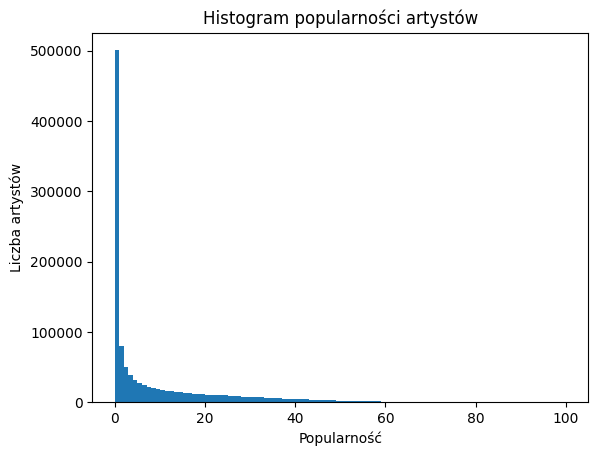

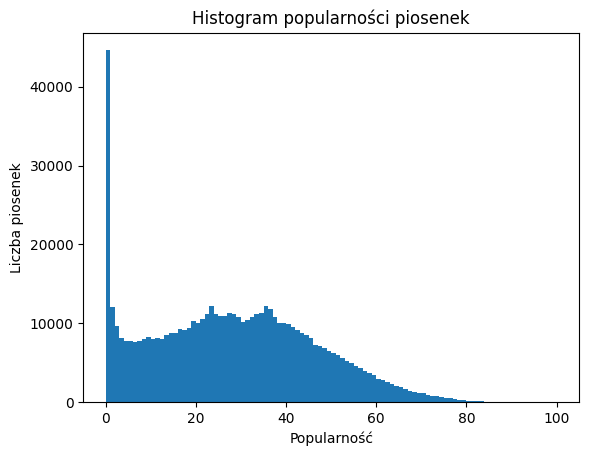

In [ ]:
import matplotlib.pyplot as plt

# Histogram popularno≈õci artyst√≥w
plt.hist(df_artists["popularity"], bins=100)
plt.title("Histogram popularno≈õci artyst√≥w")
plt.xlabel("Popularno≈õƒá")
plt.ylabel("Liczba artyst√≥w")
plt.show()

# Histogram popularno≈õci piosenek
plt.hist(df_tracks["popularity"], bins=100)
plt.title("Histogram popularno≈õci piosenek")
plt.xlabel("Popularno≈õƒá")
plt.ylabel("Liczba piosenek")
plt.show()

In [ ]:
# Filtracja artyst√≥w i piosenek
df_artists = df_artists[df_artists["popularity"] >= 55]
df_tracks = df_tracks[(df_tracks["popularity"] >= 45) & (df_tracks["duration_ms"] <= 600000)]

In [ ]:
extract_artist_id(df_tracks)
df_songs = pd.merge(df_tracks, df_artists, left_on="main_artist_id", right_on="id", suffixes=("_track", "_artist"))
df_songs.drop_duplicates(subset=["name_track", "name_artist"], inplace=True)
songs_info_cols = ["name_track", "name_artist", "genres"]
df_songs_info = df_songs[songs_info_cols]

In [ ]:
songs_info_cols = ["name_track", "name_artist", "genres"]
df_songs_info = df_songs[songs_info_cols]

In [ ]:
songs_features_cols = [
    "duration_ms", "explicit", "key", "loudness", "mode", "speechiness",
    "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature"
]
df_songs_features = df_songs[songs_features_cols]

In [ ]:
liczba_piosenek = len(df_songs)
print("Liczba piosenek:", liczba_piosenek)

Liczba piosenek: 76040


Mamy teraz przygotowane dane, wiƒôc mo≈ºna braƒá siƒô za klasteryzacjƒô. Nasz zbi√≥r jest do≈õƒá du≈ºy, nawet po dokonanym ostrym filtrowaniu, wiƒôc potrzebujemy skalowalnych algorytm√≥w klasteryzacji. Klasteryzacja hierarchiczna zdecydowanie odpada, pozostajƒÖ wiƒôc k-means, DBSCAN i HDBSCAN. Co prawda hiperparametry do DBSCAN ciƒô≈ºko jest dobraƒá, ale zobaczymy, jak mo≈ºna to zrobiƒá.

Zanim przejdziemy do klasteryzacji, trzeba ustandardyzowaƒá nasze dane. Po tym trzeba przeprowadziƒá te≈º globalnƒÖ analizƒô naszego zbioru, jak na przyk≈Çad rozk≈Çady cech, albo zwizualizowaƒá go z pomocƒÖ redukcji wymiaru. Jest to wa≈ºne, bo przy p√≥≈∫niejszej analizie klastr√≥w musimy wiedzieƒá, czy klastry w og√≥le r√≥≈ºniƒÖ siƒô od og√≥≈Çu naszych danych.

**Zadanie 2 (1 punkt)**

1. Dokonaj standaryzacji cech, tworzƒÖc ramkƒô `X`.
2. Uzupe≈Çnij kod klasy `ClusteringVisualizer`, kt√≥ra przyjmuje dane, numery klastr√≥w dla poszczeg√≥lnych punkt√≥w (opcjonalne), i przedstawia wykresy PCA oraz UMAP:
   - zredukuj dane do 2 wymiar√≥w
   - pamiƒôtaj o `random_state=0`
   - [dokumentacja UMAP](https://umap-learn.readthedocs.io/en/latest/basic_usage.html)
   - przeka≈º `low_memory=False` dla UMAP
   - ze wzglƒôdu na specyfikƒô implementacji, wykorzystanie `.fit_transform()` bƒôdzie zauwa≈ºalnie szybsze od osobnych `.fit()` i `.transform()`
   - skomentuj:
     - czy w przypadkU PCA widaƒá jakƒÖ≈õ strukurƒô klastr√≥w?
     - czy widaƒá jƒÖ w przypadku UMAP?
     - czy redukcja nieliniowa da≈Ça lepsze, czy gorsze wyniki od liniowego PCA w wizualizacji?

Czemu klasa, a nie funkcja? UMAP, jak praktycznie wszystkie metody nieliniowej redukcji wymiaru, wykorzystuje graf najbli≈ºszych sƒÖsiad√≥w. Je≈ºeli obliczymy dane po redukcji raz, i zapiszemy jako atrybut, to p√≥≈∫niej bƒôdziemy mogli uniknƒÖƒá liczenia tego wielokrotnie. Zapisanie tych wynik√≥w zaoszczƒôdzi nam wiele minut :)

In [ ]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X = scaler.fit_transform(df_songs_features)

In [ ]:
from typing import Optional

from IPython.display import display
from sklearn.decomposition import PCA
from umap.umap_ import UMAP


class ClusteringVisualizer:
    def __init__(self, X: np.ndarray | pd.DataFrame):
        # perform PCA and UMAP
        # save results as Numpy arrays
        pca = PCA(n_components=2, random_state=0)
        self.X_2d_pca = pca.fit_transform(X)
        self.X_2d_pca = self.X_2d_pca.to_numpy()
        umap_reducer = UMAP(n_components=2, random_state=0, low_memory=False)
        self.X_2d_umap = umap_reducer.fit_transform(X)

    def visualize(self, labels: Optional[np.ndarray] = None):
        if labels is None:
            labels = np.ones(len(X))

        fig, axes = plt.subplots(1, 2, figsize=(9, 3))

        axes[0].scatter(self.X_2d_pca[:, 0], self.X_2d_pca[:, 1], c=labels)
        axes[1].scatter(self.X_2d_umap[:, 0], self.X_2d_umap[:, 1], c=labels)

        axes[0].title.set_text("PCA")
        axes[1].title.set_text("UMAP")

        fig.suptitle("Clustering visualization")
        plt.show()

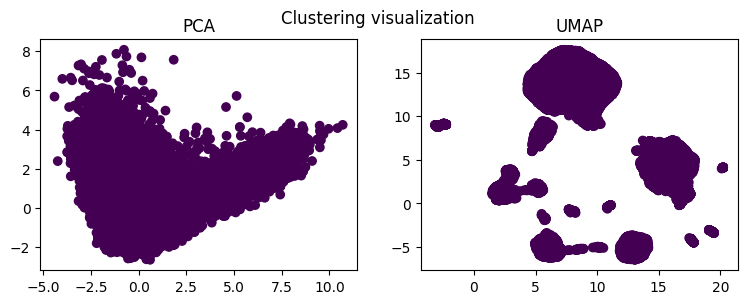

In [ ]:
clustering_visualizer = ClusteringVisualizer(X)
clustering_visualizer.visualize()

PCA nie zadzia≈Ça≈Ço najlepiej i nie widaƒá struktury klastr√≥w. UMAP za to dobrze klastruje piosenki :). Jak widaƒá PCA ma gorsze wyniki ni≈º redukcja nieliniowa.

Teraz przeanalizujemy nasz zbi√≥r. Pos≈Çu≈ºƒÖ nam do tego poni≈ºej zdefiniowane klasy `KMeansAnalzyer`, `DBSCANAnalyzer` i `HDBSCANAnalyzer`. Metoda `.analyze_clustering()` dla ka≈ºdego klastra:
1. Wypisuje liczbƒô klastr√≥w, oraz informacjƒô o szumie (dla DBSCAN i HDBSCAN).
2. Wypisuje warto≈õƒá metryki [Calinski-Harabasz index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html), je≈ºeli liczba klastr√≥w to co najmniej 2. Dla DBSCAN i HDBSCAN uwzglƒôdniamy tylko punkty z klastr√≥w, ignorujƒÖc szum.
2. Rysuje wykres klastr√≥w po redukcji z PCA oraz UMAP.
3. Tworzy [wykres radowy (radar chart)](https://plotly.com/python/radar-chart/). Pozwala on wygodnie por√≥wnaƒá warto≈õci ≈õrednie dla poszczeg√≥lnych cech.
4. Wypisuje piosenki i artyst√≥w reprezentujƒÖce klaster:
   - dla k-means jest to 10 punkt√≥w najbli≈ºszych do centroidu
   - dla DBSCAN wybieramy heurystycznie 10 punkt√≥w najbli≈ºszych do centroidu
   - dla HDBSCAN wybieramy punkty o najwy≈ºszym prawdopodobie≈Ñstwie (nie u≈ºywamy exemplars, bo jest to bardzo wolne [i ma≈Ço wygodne](https://github.com/scikit-learn-contrib/hdbscan/issues/304))
5. Wypisuje 10 najczƒôstszych gatunk√≥w muzycznych w klastrze.

Dla DBSCAN i HDBSCAN, kt√≥re same wykrywajƒÖ liczbƒô klastr√≥w i mo≈ºe byƒá ich bardzo du≈ºo, analizowane jest tylko:
- max 10 najwiƒôkszych klastr√≥w
- tylko te, kt√≥re majƒÖ co najmniej 100 pr√≥bek

Na poczƒÖtek potraktujemy ca≈Çy nasz zbi√≥r jako jeden wielki klaster dla algorytmu k-means i popatrzymy, co tam siƒô dzieje.

In [ ]:
import itertools
from abc import ABC, abstractmethod
from collections import Counter

import plotly.graph_objects as go

from hdbscan import HDBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import minmax_scale


class ClusteringAnalyzer(ABC):
    def __init__(
        self, df_songs_info: pd.DataFrame, clustering_visualizer: ClusteringVisualizer
    ):
        self.df_songs_info = df_songs_info
        self.clustering_visualizer = clustering_visualizer

    @abstractmethod
    def analyze_clustering(self, X: pd.DataFrame, clustering) -> None:
        raise NotImplementedError()

    def _get_top_clusters_labels(self, labels: np.ndarray) -> np.ndarray:
        labels = labels[labels != -1]
        label_counts = pd.Series(labels).value_counts()
        label_counts = label_counts[label_counts >= 100]
        top_labels = label_counts.index[:10].values
        return top_labels

    def _create_radar_chart(self, X: pd.DataFrame, label: int) -> None:
        fig = go.Figure()
        vals = minmax_scale(X).mean()
        fig.add_trace(go.Scatterpolar(r=vals, theta=X.columns, fill="toself"))
        fig.update_layout(title_text=f"Cluster {label}", title_x=0.5)
        fig.update_polars(radialaxis=dict(range=[0, 1]))
        fig.show()

    def _get_central_songs(
        self, X: pd.DataFrame, cluster_songs_info: pd.DataFrame, prototype: np.ndarray
    ) -> None:
        n_neighbors = min(10, len(X))
        nn = NearestNeighbors(n_neighbors=n_neighbors, n_jobs=-1)
        nn.fit(X.values)
        _, nn_idxs = nn.kneighbors(prototype)
        nn_idxs = nn_idxs.ravel()
        nn_songs_info = cluster_songs_info.iloc[nn_idxs]
        nn_songs_info = nn_songs_info.drop(columns="genres")
        nn_songs_info.columns = ["Track", "Artist"]
        nn_songs_info = nn_songs_info.reset_index(drop=True)
        display(nn_songs_info)

    def _get_cluster_top_genres(
        self,
        cluster_songs_info: pd.DataFrame,
    ) -> None:
        genres = cluster_songs_info["genres"].values
        genres = [ast.literal_eval(x) for x in genres]
        genres = Counter(itertools.chain(*genres))
        top_genres = genres.most_common(10)
        top_genres = [name for name, count in top_genres]
        print("Top 10 genres in the cluster:", top_genres)


class KMeansAnalyzer(ClusteringAnalyzer):
    def analyze_clustering(self, X: pd.DataFrame, clustering: KMeans) -> None:
        labels = clustering.labels_
        centroids = clustering.cluster_centers_

        print(f"Number of clusters: {max(labels) + 1}")

        if labels.max() >= 2:
            ch_index = calinski_harabasz_score(X, labels)
            print(f"CH-index value: {ch_index:.2f}")

        self.clustering_visualizer.visualize(labels)

        for label in range(0, max(labels) + 1):
            X_cluster = X[labels == label]
            cluster_songs_info = self.df_songs_info[labels == label]
            centroid = centroids[label].reshape((1, -1))

            print(f"Cluster {label} size: {len(X_cluster)}")
            self._create_radar_chart(X_cluster, label)
            self._get_central_songs(X_cluster, cluster_songs_info, centroid)
            self._get_cluster_top_genres(cluster_songs_info)


class DBSCANAnalyzer(ClusteringAnalyzer):
    def analyze_clustering(self, X: pd.DataFrame, clustering: KMeans) -> None:
        labels = clustering.labels_

        noise_num = (labels == -1).sum()
        noise_perc = noise_num / len(X)

        print(f"Number of clusters: {max(labels) + 1}")
        print(f"Percentage of noise points: {100 * noise_perc:.2f}%")

        if labels.max() >= 2:
            X_non_noise = X[labels != -1]
            labels_non_noise = labels[labels != -1]
            ch_index = calinski_harabasz_score(
                X_non_noise,
                labels_non_noise,
            )
            print(f"CH-index value: {ch_index:.2f}")

        self.clustering_visualizer.visualize(labels)

        for label in self._get_top_clusters_labels(labels):
            X_cluster = X[labels == label]
            cluster_songs_info = self.df_songs_info[labels == label]
            centroid = self._get_cluster_centroid(X_cluster)

            print(f"Cluster {label} size: {len(X_cluster)}")
            self._create_radar_chart(X_cluster, label)
            self._get_central_songs(X_cluster, cluster_songs_info, centroid)
            self._get_cluster_top_genres(cluster_songs_info)

    def _get_cluster_centroid(self, X_cluster: pd.DataFrame) -> np.ndarray:
        centroid = np.mean(X_cluster.values, axis=0)
        return np.array(centroid).reshape((1, -1))


class HDBSCANAnalyzer(ClusteringAnalyzer):
    def analyze_clustering(self, X: pd.DataFrame, clustering: HDBSCAN) -> None:
        labels = clustering.labels_
        probas = clustering.probabilities_

        noise_num = (labels == -1).sum()
        noise_perc = noise_num / len(X)

        print(f"Number of clusters: {max(labels) + 1}")
        print(f"Percentage of noise points: {100 * noise_perc:.2f}%")

        if labels.max() >= 2:
            X_non_noise = X[labels != -1]
            labels_non_noise = labels[labels != -1]
            ch_index = calinski_harabasz_score(
                X_non_noise,
                labels_non_noise,
            )
            print(f"CH-index value: {ch_index:.2f}")

        self.clustering_visualizer.visualize(labels)

        for label in self._get_top_clusters_labels(labels):
            X_cluster = X[labels == label]
            cluster_songs_info = self.df_songs_info[labels == label]
            cluster_probas = probas[labels == label]

            print(f"Cluster {label} size: {len(X_cluster)}")
            self._create_radar_chart(X_cluster, label)
            self._get_most_probable_songs(cluster_songs_info, cluster_probas)
            self._get_cluster_top_genres(cluster_songs_info)

    def _get_most_probable_songs(
        self, cluster_songs_info: pd.DataFrame, cluster_probas: np.ndarray
    ) -> None:
        top_10_indexes = np.argpartition(cluster_probas, -10)[-10:]
        nn_songs_info = cluster_songs_info.iloc[top_10_indexes]
        nn_songs_info = nn_songs_info.drop(columns="genres")
        nn_songs_info.columns = ["Track", "Artist"]
        nn_songs_info = nn_songs_info.reset_index(drop=True)
        display(nn_songs_info)

Number of clusters: 1


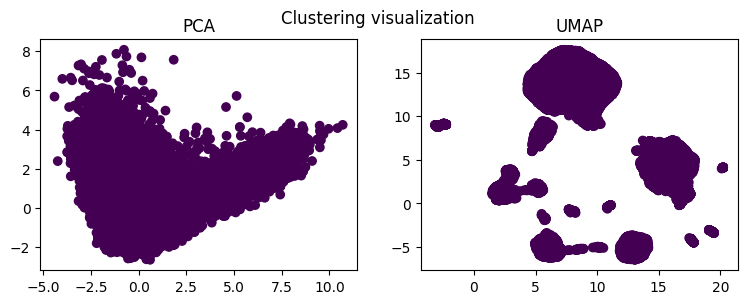

Cluster 0 size: 76040


Track              Artist
0                            H.I.E.L.O.                Duki
1                  Confiado & Tranquilo        Paulo Londra
2                  R√ºyalarda Buru≈ümu≈üum             Adamlar
3   Lay It All on Me (feat. Ed Sheeran)          Rudimental
4                      Regenbogenfarben         Kerstin Ott
5                   Probl√®mes d'adultes     Sexion d'Assaut
6               Je me dis que toi aussi  Boulevard des Airs
7  Nena Maldici√≥n (feat. Lenny Tav√°rez)        Paulo Londra
8                                 Amame     Alexandre Pires
9                         Frank Sinatra                Cake

Top 10 genres in the cluster: ['rock', 'pop', 'dance pop', 'latin', 'classic rock', 'latin pop', 'rap', 'mellow gold', 'soft rock', 'hip hop']


In [ ]:
from sklearn.cluster import KMeans


clustering = KMeans(n_clusters=1, n_init="auto", random_state=0)
clustering.fit(X)

kmeans_analyzer = KMeansAnalyzer(df_songs_info, clustering_visualizer)
kmeans_analyzer.analyze_clustering(X, clustering)

WyglƒÖda na to, ≈ºe najpopularniejsze sƒÖ pop i rock, a najbardziej "typowe" piosenki te≈º nale≈ºƒÖ do takiej grupy. Og√≥≈Ç piosenek ma do≈õƒá du≈ºƒÖ g≈Ço≈õno≈õƒá, du≈ºƒÖ dynamikƒô (wysokie time signature - "how many beats are in each bar") i sƒÖ pozytywne (valence - "tracks with high valence sound more positive"). Zasadniczo jest to zgodne z intuicjƒÖ. Ciekawe jednak, co bƒôdzie, jak wybierzemy wiƒôcej klastr√≥w.

**Zadanie 3 (1.5 punktu)**

1. Wytrenuj k-means dla 3 klastr√≥w.
2. Zwizualizuj wyniki za pomocƒÖ PCA i UMAP. Jako kolor punkt√≥w (np. parametr `c` w `plt.scatter()`) przeka≈º numery klastr√≥w dla punkt√≥w.
3. Dokonaj opisu i analizy wynikowych klastr√≥w, na przyk≈Çad:
   - czy reprezentujƒÖ jakie≈õ konkretne grupy muzyczne?
   - na ile "konkretne", sensowne sƒÖ klastry?
   - czy jest widoczna separacja klastr√≥w, czy r√≥≈ºniƒÖ siƒô od siebie?
4. Dokonaj tuningu liczby klastr√≥w:
   - sprawd≈∫ warto≈õci z zakresu [5, 20] - w ko≈Ñcu wiemy, ≈ºe gatunk√≥w jest sporo, i klastr√≥w powinno te≈º byƒá wiƒôcej
   - dla ka≈ºdej warto≈õci sprawd≈∫ warto≈õƒá metryki [Calinski-Harabasz index](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html)
   - przedstaw wykres liniowy (line plot) warto≈õci metryki
   - wybierz model o najwy≈ºszej warto≈õci metryki
   - zwizualizuj wyniki z pomocƒÖ PCA i UMAP
   - dokonaj interpretacji jego klastr√≥w
   - skomentuj:
     - czy klastry sƒÖ faktycznie lepiej interpretowalne po tuningu?
     - czy wysoko≈õƒá CH-index faktycznie odpowiada jako≈õci klasteryzacji?


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



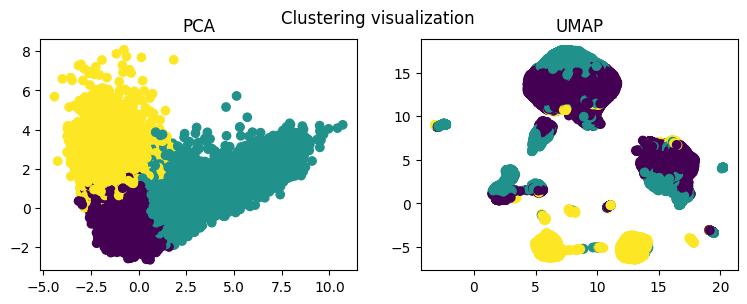

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

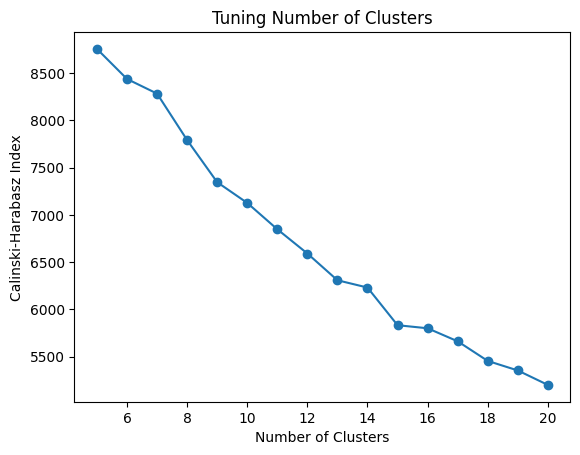

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



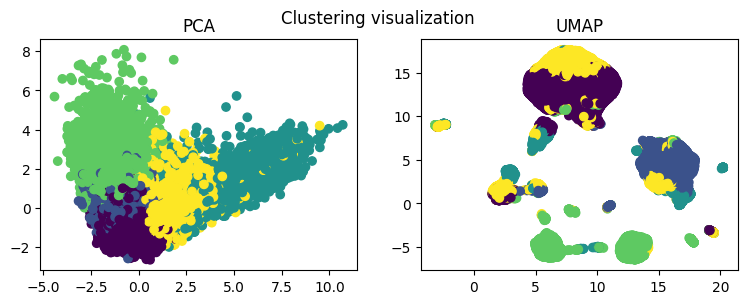

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Przypisanie etykiet klastr√≥w do danych
cluster_labels = kmeans.labels_

# Zwizualizowanie wynik√≥w za pomocƒÖ PCA i UMAP
visualizer = ClusteringVisualizer(X)
visualizer.visualize(cluster_labels)

# Tuning liczby klastr√≥w
num_clusters = range(5, 21)
ch_scores = []

for n in num_clusters:
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(X)
    ch_score = calinski_harabasz_score(X, kmeans.labels_)
    ch_scores.append(ch_score)

# Wykres liniowy CH-index
plt.plot(num_clusters, ch_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Tuning Number of Clusters')
plt.show()

# Wyb√≥r modelu o najwy≈ºszym CH-index
best_num_clusters = num_clusters[np.argmax(ch_scores)]
best_kmeans = KMeans(n_clusters=best_num_clusters, random_state=0)
best_kmeans.fit(X)

# Zwizualizowanie wynik√≥w najlepszego modelu za pomocƒÖ PCA i UMAP
best_cluster_labels = best_kmeans.labels_
visualizer_best = ClusteringVisualizer(X)
visualizer_best.visualize(best_cluster_labels)


Wed≈Çug CH index najlepsze wyniki ma 5 klastr√≥w(im wy≈ºej tym lepiej), co lekko poprawi≈Ço interpretowalno≈õƒá¬†wynik√≥w. Jednak biorƒÖc pod uwagƒô fakt, ≈ºe gatunk√≥w muzycznych by≈Ço wiƒôcej ni≈º 5, to uwa≈ºam ≈ºe CH index nie jest idealnƒÖ metrykƒÖ :), jednak mo≈ºe to problem tego ≈ºe k means wykrywa tylko klastry sferyczne.

Problem z k-means jest taki, ≈ºe wykrywa tylko klastry sferyczne. W przypadku zbior√≥w, w kt√≥rych klastry mogƒÖ byƒá mocno wymieszane, bƒôdzie to szczeg√≥lnym problemem. Tak mo≈ºe byƒá tutaj - w ko≈Ñcu mamy co najmniej kilka podgatunk√≥w rocka i popu, kt√≥re sƒÖ zbli≈ºone do siebie. Mamy te≈º do≈õƒá egzotyczne podgatunki takie jak "art rock" czy "rock en espanol", kt√≥re byƒá mo≈ºe sƒÖ nieliczne i stanowiƒÖ de facto szum.

Do takich sytuacji doskonale nadaje siƒô DBSCAN. Ma co prawda wiƒôkszƒÖ z≈Ço≈ºono≈õƒá, ale dla danych tego rozmiaru jest to jeszcze akceptowalne. Sprawd≈∫my, jak dzia≈Ça dla domy≈õlnych hiperparametr√≥w - epsilon 0.5 i min_samples 5.

Number of clusters: 267
Percentage of noise points: 92.80%
CH-index value: 32.46


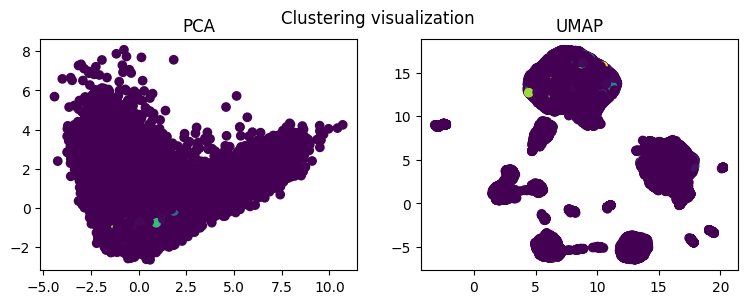

Cluster 4 size: 2961


Track               Artist
0                                Love Today                 MIKA
1                             Mirala Miralo     Alejandra Guzman
2  The Karma Theme - Telugu (From "U Turn")  Anirudh Ravichander
3                  M√≠rala, M√≠ralo - En Vivo     Alejandra Guzman
4                                     CROWN  TOMORROW X TOGETHER
5        Baila Morena - New Spanish Version             Zucchero
6                             No Such Thing           John Mayer
7                        Walau Habis Terang                 Noah
8                             New Romantics         Taylor Swift
9                                 Bailarina        Maldita Nerea

Top 10 genres in the cluster: ['pop', 'dance pop', 'rock', 'pop rock', 'post-teen pop', 'latin', 'latin pop', 'modern rock', 'classic rock', 'rock en espanol']
Cluster 21 size: 209


Track         Artist
0                      YO VISTO AS√ç      Bad Bunny
1        Auf das, was da noch kommt  Max Giesinger
2                   Girl's Not Grey            AFI
3      Ahora Lloras T√∫ (feat. CNCO)       Ana Mena
4  IL MIO AMICO (feat. Fabri Fibra)         Madame
5                      ÎÑàÎùºÍ≥† It's You   SUPER JUNIOR
6                      On The Beach          Jub√´l
7                         Peligrosa       J Balvin
8                      Berre i natt        Rotlaus
9                         10 Months        ENHYPEN

Top 10 genres in the cluster: ['dance pop', 'pop', 'post-teen pop', 'latin', 'rock', 'edm', 'latin pop', 'pop dance', 'turkish pop', 'modern rock']
Cluster 1 size: 108


Track           Artist
0                               I Won't Let Go    Rascal Flatts
1                                           Â§ßÁú†       Cyndi Wang
2                           Beautiful In White     Matt Johnson
3           If I Die Young (Glee Cast Version)        Glee Cast
4                             I See A Darkness      Johnny Cash
5                        ÊúÄ‰Ω≥ÊêçÂèã - Single Version       Eason Chan
6                            Tak Ingin Sendiri      Felix Irwan
7                              Un giorno credi  Edoardo Bennato
8  The Gift (feat. Collin Raye & Susan Ashton)     Jim Brickman
9                                    Untuk Apa     Maudy Ayunda

Top 10 genres in the cluster: ['latin', 'latin pop', 'latin arena pop', 'opm', 'pop', 'indonesian pop', 'viral pop', 'mandopop', 'tropical', 'mexican pop']


In [ ]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(n_jobs=-1)
clustering.fit(X)

dbscan_analyzer = DBSCANAnalyzer(df_songs_info, clustering_visualizer)
dbscan_analyzer.analyze_clustering(X, clustering)

Mamy niesamowicie du≈ºo klastr√≥w oraz szumu - niedobrze! Oznacza to, ≈ºe zbyt ciƒô≈ºko jest "dotrzeƒá" do kolejnych punkt√≥w, ≈ºeby stworzyƒá klastry. MogƒÖ byƒá tego dwie przyczyny:
- zbyt ma≈Çy promie≈Ñ epsilon
- zbyt du≈ºe min_samples

BiorƒÖc pod uwagƒô, ≈ºe minimalna liczba pr√≥bek to zaledwie 5, to to drugie nie wystƒôpuje. Musimy zatem zwiƒôkszyƒá promie≈Ñ. Ale jak, skoro nie znamy jednostek?

Dob√≥r hiperparametr√≥w w DBSCAN dobrze opisuje [ten post](http://www.sefidian.com/2022/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/), kt√≥ry zgadza siƒô zresztƒÖ z "Data Clustering" Charu C. Aggarwala.

Warto≈õƒá min_samples mo≈ºna przyjƒÖƒá z grubsza (rule-of-thumb) jako liczbƒô wymiar√≥w razy 2. Bierze to poprawkƒô na rzadko≈õƒá przestrzeni, i generalnie jest dobrƒÖ warto≈õciƒÖ wyj≈õciowƒÖ. Je≈ºeli mamy du≈ºo szumu, to mo≈ºna pr√≥bowaƒá wiƒôcej.

Przy sta≈Çym min_samples heurystyka do wyboru epsilon wyglƒÖda nastƒôpujƒÖco. Obliczamy rozk≈Çad odleg≈Ço≈õci do k najbli≈ºszych sƒÖsiad√≥w, przyjmujƒÖc k = min_samples, a nastƒôpnie przedstawiamy to na wykresie. Typowo bƒôdzie mia≈Ç kszta≈Çt z grubsza zbli≈ºony do litery L (lub odwr√≥conego L), i dobra warto≈õƒá epsilon jest na punkcie przegiƒôcia tego wykresu, tzw. elbow / knee.

**Zadanie 4 (1.5 punktu)**

Stw√≥rz wykres odleg≈Ço≈õci do najbli≈ºszych sƒÖsiad√≥w, przyjmujƒÖc liczbƒô najbli≈ºszych sƒÖsiad√≥w r√≥wnƒÖ 2 razy liczba cech. Mo≈ºe siƒô przydaƒá [ten tutorial](https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd).

Odczytaj z wykresu warto≈õƒá punktu przegiƒôcia. Czy jest to ≈Çatwe? Czy jeste≈õ w stanie jƒÖ wyznaczyƒá dok≈Çadnie?

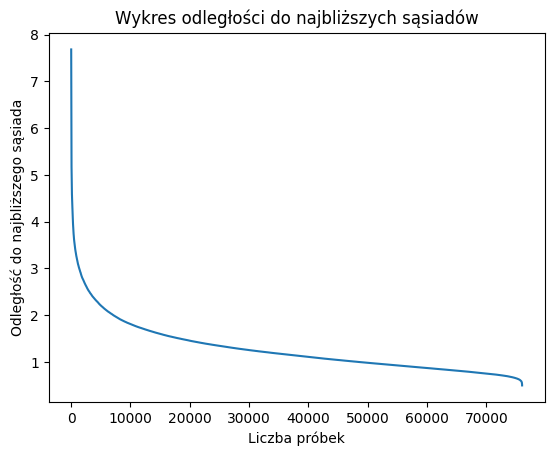

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Tworzenie instancji NearestNeighbors
n_neighbors = 2 * X.shape[1]  # Liczba najbli≈ºszych sƒÖsiad√≥w
neighbors = NearestNeighbors(n_neighbors=n_neighbors)
neighbors.fit(X)

# Obliczanie odleg≈Ço≈õci do najbli≈ºszych sƒÖsiad√≥w
distances, _ = neighbors.kneighbors(X)

# Sortowanie odleg≈Ço≈õci od najwiƒôkszej do najmniejszej
max_distances = distances.max(axis=1)
max_distances_sorted = sorted(max_distances, reverse=True)

# Wykres odleg≈Ço≈õci do najbli≈ºszych sƒÖsiad√≥w
plt.plot(range(len(max_distances_sorted)), max_distances_sorted)
plt.xlabel('Liczba pr√≥bek')
plt.ylabel('Odleg≈Ço≈õƒá do najbli≈ºszego sƒÖsiada')
plt.title('Wykres odleg≈Ço≈õci do najbli≈ºszych sƒÖsiad√≥w')
plt.show()

Nie jest ≈Çatwo odczytaƒá warto≈õc tego punktu ale na oko powiedzia≈Çbym, ≈ºe to bƒôdzie x = 6000 y = 2.4.

Taka heurystyczna metoda jest wykorzystywana w wielu przypadkach doboru hiperparametr√≥w w klasteryzacji. Zasadnicza idea jest taka, ≈ºe punkt przegiƒôcia odpowiada momentowi, gdzie dane zaczynajƒÖ wyra≈∫nie rozr√≥≈ºniaƒá siƒô od siebie i tworzyƒá wyra≈∫ne grupy. Jest to proste i szybkie, ale jest do≈õƒá nieprecyzyjne w por√≥wnaniu do innych metod (je≈ºeli w og√≥le istniejƒÖ dla danego zadania!). Je≈ºeli chcemy zrobiƒá walidacjƒô skro≈õnƒÖ, korzystajƒÖc z jakiej≈õ metryki, to taki wykres daje nam sensowny punkt wyj≈õcia do zakresu hiperparametru.

Warto te≈º pamiƒôtaƒá, ≈ºe klasteryzacja to proces z natury interaktywny. Takie wykresy sƒÖ wa≈ºne, bo zwiƒôkszajƒÖ naszƒÖ intuicjƒô, ale np. dok≈Çadne dobranie warto≈õci jest typowo robione rƒôcznie.

**Zadanie 5 (1.5 punktu)**

Wytrenuj DBSCAN z promieniem epsilon wyznaczonym z wykresu i min_samples r√≥wnym 2 razy liczbie cech. W razie potrzeby zmniejsz lub zwiƒôksz epsilon, aby uzyskaƒá wyniki, kt√≥re wydajƒÖ siƒô sensowne (liczba klastr√≥w, procent szumu, CH-index).

Dokonaj analizy wyj≈õciowych klastr√≥w. Czy finalna ich liczba oraz procent szumu sƒÖ sensowne? Czy klastry sƒÖ lepiej widoczne, lub lepiej interpretowalne, ni≈º w przypadku k-means?

// skomentuj tutaj

DBSCAN ma dwie zasadnicze wady: trudny dob√≥r hiperparametr√≥w oraz podatno≈õƒá na szum. W szczeg√≥lno≈õci to drugie widaƒá, je≈ºeli w naszym zbiorze ciƒÖgle znajduje on du≈ºo szumu - to oznaka, ≈ºe mamy zmiennƒÖ gƒôsto≈õƒá w danych i przyda≈Çoby siƒô co≈õ adaptacyjnego, jak OPTICS albo HDBSCAN. OPTICS jest bardziej zoptymalizowany pod pamiƒôƒá ni≈º szybko≈õƒá w scikit-learn, plus ma raczej nieintuicyjne hiperparametry (mo≈ºe nawet bardziej, ni≈º DBSCAN), wiƒôc wykorzystamy tutaj HDBSCAN.

Jego g≈Ç√≥wnym hiperparametrem jest `min_cluster_size`, czyli po prostu minimalna liczba punkt√≥w, aby stworzyƒá klaster. Dodatkowo `min_samples` ma takie samo znaczenie, jak w DBSCAN, czyli jest to minimalna liczba punkt√≥w, aby utworzyƒá punkt typu CORE. Domy≈õlnie sƒÖ one r√≥wne, ale oczywi≈õcie mo≈ºna ustawiƒá `min_samples` (sporo) mniejsze od `min_cluster_size`, i dostrajaƒá oba.

Co wa≈ºne, HDBSCAN potrafi cache'owaƒá wyniki oblicze≈Ñ dla sta≈Çego `min_samples`, dlatego warto je czasem ustawiaƒá choƒáby tylko z tego powodu. Caching wymaga te≈º podania argumentu `memory`. Przyspiesza to drugie i kolejne wykonania algorytmu o rzƒôdy wielko≈õci.

In [ ]:
from hdbscan import HDBSCAN


clustering = HDBSCAN(memory="tmp")
clustering.fit(X)

dbscan_analyzer = HDBSCANAnalyzer(df_songs_info, clustering_visualizer)
dbscan_analyzer.analyze_clustering(X, clustering)

Domy≈õlne `min_cluster_size` to zaledwie 5, a mimo tego HDBSCAN wcale nie znalaz≈Ç tak du≈ºo klastr√≥w - pokazuje to jego zdolno≈õƒá do adaptacji do zbioru danych. CH-index nie jest zbyt wysoki, pomimo tego, ≈ºe niekt√≥re klastry wydajƒÖ siƒô ciekawe i inne ni≈º w k-means. Pokazuje to te≈º, ≈ºe klastry pewnie nie sƒÖ sferyczne.

**Zadanie 6 (2 punkty)**

Dokonaj rƒôcznego tuningu hiperparametr√≥w `min_cluster_size` oraz `min_samples`. Pamiƒôtaj, ≈ºe przy sta≈Çym `min_samples` mo≈ºesz praktycznie za darmo zmieniaƒá `min_cluster_size` dziƒôki cache'owaniu.

Skomentuj finalne wyniki. Czy uda≈Ço siƒô uzyskaƒá sensowne, interpretowalne klastry? Czy sƒÖ one w jakim≈õ stopniu nieoczywiste, tj. czy otrzymali≈õmy jakƒÖ≈õ nowƒÖ wiedzƒô dziƒôki klasteryzacji? Czy CH-index wskaza≈Ç sensownie na jako≈õƒá klasteryzacji w HDBSCAN?

// skomentuj tutaj

## Zadanie dodatkowe (3 punkty)

Klasteryzacja hierarchiczna jest przydatnym narzƒôdziem, dajƒÖcym od razu znacznƒÖ ilo≈õƒá informacji co do klasteryzacji, ale ze wzglƒôdu na z≈Ço≈ºono≈õƒá nadaje siƒô tylko do mniejszych zbior√≥w danych. Takim zbiorem jest dobrze nam ju≈º znany [Ames housing](https://www.openintro.org/book/statdata/?data=ames).

1. Za≈Çaduj zbi√≥r i dokonaj odpowiedniego preprocessingu. Zwizualizuj go z pomocƒÖ PCA oraz UMAP.
2. Zastosuj klasteryzacjƒô hierarchicznƒÖ do tego zbioru, wykorzystujƒÖc metrykƒô euklidesowƒÖ i Ward linkage.
3. Narysuj dendrogram dla wynikowej klasteryzacji. Czy widaƒá jakƒÖ≈õ strukturƒô klastrujƒÖcƒÖ? Sprawd≈∫ kilka przyk≈Çadowych pr√≥bek, kt√≥re wydajƒÖ siƒô podobne - czy faktycznie te domy sƒÖ podobne?
4. Wybierz klasteryzacjƒô, kt√≥ra wydaje siƒô najbardziej stabilna, tj. ma najd≈Çu≈ºsze pionowe linie na dendrogramie. Sprawd≈∫ jej CH-index, oraz zwizualizuj jƒÖ za pomocƒÖ PCA oraz UMAP. Ile ma ona klastr√≥w? Czy wydaje siƒô ona sensowna? Wypisz przyk≈Çadowe domy z klastr√≥w. Czy faktycznie wskazujƒÖ na zr√≥≈ºnicowanie klastr√≥w?
5. Por√≥wnaj tƒô klasteryzacjƒô z k-means (dokonaj tuningu liczby klastr√≥w z pomocƒÖ CH-index) oraz HDBSCAN. Ile klastr√≥w wybra≈Çy te metody? Czy na wizualizacji PCA i UMAP dajƒÖ lepsze, czy gorsze wyniki od klasteryzacji hierarchicznej?